# Import Libraries

In [1]:
import pandas as pd # Library for open files
import numpy as np # Library for mathematical operations
import matplotlib.pyplot as plt # Library for graph

# Load Data

In [2]:
#                                       Path                                             File Name  Extension
path = r'D:\Abdulrhman Osama\Machine Learning Projects\Exam Classification (from scratch)\ex2data1.txt'

#                                              Column 1   Column 2  Target
df = pd.read_csv(path, header = None, names = ['Exam 1', 'Exam 2', 'Admitted'])

print('Data Frame:')
df.head(10) # show the first ten rows from the data

Data Frame:


,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [3]:
print('Data Describe:')
df.describe() # describe the data by the minimum, maximum, the number of it, mean, standard deviation, etc...

Data Describe:


,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


# Rearrange Data

In [4]:
ones = df[df['Admitted'].isin([1])] # All admitted students

zeros = df[df['Admitted'].isin([0])] # All not admitted students

print('Admitted "Ones":')
print(ones)
print()
print('Admitted "Zeros":')
print(zeros)

Admitted "Ones":
       Exam 1     Exam 2  Admitted
3   60.182599  86.308552         1
4   79.032736  75.344376         1
6   61.106665  96.511426         1
7   75.024746  46.554014         1
8   76.098787  87.420570         1
9   84.432820  43.533393         1
12  82.307053  76.481963         1
13  69.364589  97.718692         1
15  53.971052  89.207350         1
16  69.070144  52.740470         1
18  70.661510  92.927138         1
19  76.978784  47.575964         1
21  89.676776  65.799366         1
24  77.924091  68.972360         1
25  62.271014  69.954458         1
26  80.190181  44.821629         1
30  61.379289  72.807887         1
31  85.404519  57.051984         1
33  52.045405  69.432860         1
37  64.176989  80.908061         1
40  83.902394  56.308046         1
42  94.443368  65.568922         1
46  77.193035  70.458200         1
47  97.771599  86.727822         1
48  62.073064  96.768824         1
49  91.564974  88.696293         1
50  79.944818  74.163119         1
51 

# Draw the data on a plot

Text(0, 0.5, 'Exam 2 Score')

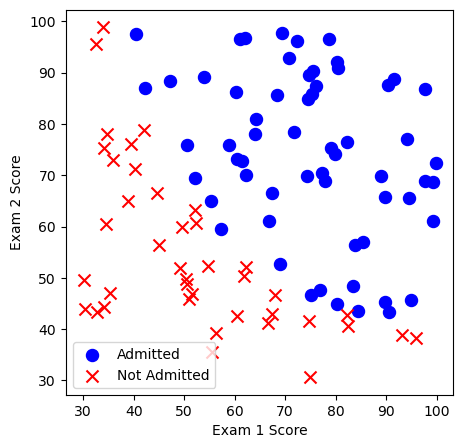

In [5]:
fig, ax = plt.subplots(figsize = (5, 5))

ax.scatter(ones['Exam 1'], ones['Exam 2'], s = 75, c = 'b', marker = 'o', label = 'Admitted')
ax.scatter(zeros['Exam 1'], zeros['Exam 2'], s = 75, c = 'r', marker = 'x', label = 'Not Admitted')

ax.legend()

ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [6]:
Admitted_Data = df['Admitted'].value_counts()
# Count the number of students that are admitted '1'
# & count the number of students that are not admitted '0'
Admitted_Data

Admitted
1    60
0    40
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

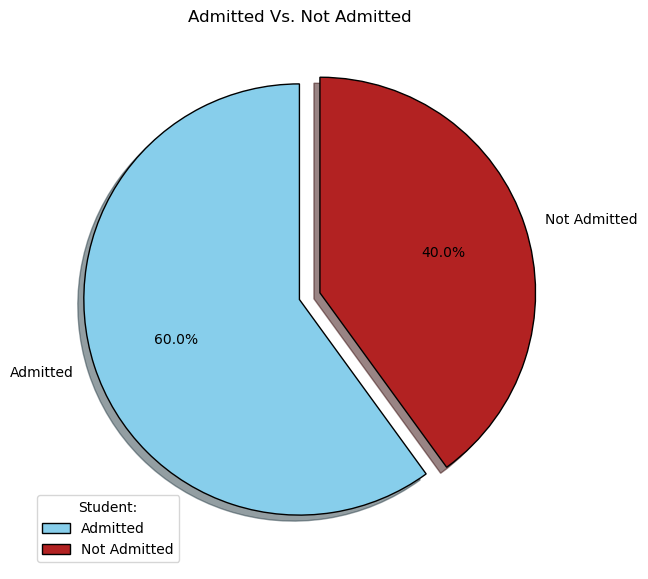

In [7]:
fig, ax = plt.subplots(figsize = (7, 7))

Admitted_Data.plot(kind = 'pie', ylabel = '', startangle = 90, autopct = '%1.1f%%', colors = ['skyblue', 'firebrick'],
       labels = ['Admitted', 'Not Admitted'], explode = (0, 0.1), wedgeprops = {'edgecolor' : 'black', 'linewidth' : 1}, shadow = True)

plt.legend(title = 'Student:', loc = 'lower left')
plt.title('Admitted Vs. Not Admitted')

plt.show

# Sigmoid Function

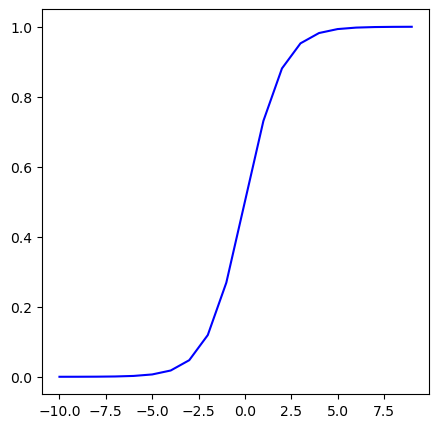

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
nums = np.arange(-10, 10, step = 1)

fig, ax = plt.subplots(figsize = (5, 5))
ax.plot(nums, sigmoid(nums), 'b')

# Cost Function

In [9]:
def cost(theta, X, Y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    Y = np.matrix(Y)

    first = np.multiply(-Y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - Y), np.log(1 - sigmoid(X * theta.T)))

    return np.sum(first - second) / len(X)

In [10]:
df.insert(0, 'Ones', 1)

In [11]:
df.head(10)

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1
5,1,45.083277,56.316372,0
6,1,61.106665,96.511426,1
7,1,75.024746,46.554014,1
8,1,76.098787,87.420570,1
9,1,84.432820,43.533393,1


In [12]:
cols = df.shape[1]
X = df.iloc[ : , 0 : cols - 1]
Y = df.iloc[ : , cols - 1 : cols]

X = np.array(X.values) # Exam 1, Exam 2
Y = np.array(Y.values) # Admitted
theta = np.zeros(3)

print('X shape:', X.shape) # 100 Row * 2 Columns
print('theta shape:', theta.shape)
print('Y shape:', Y.shape) # 100 Row * 1 Column

X shape: (100, 3)
theta shape: (3,)
Y shape: (100, 1)


In [13]:
This_Cost = cost(theta, X, Y)
print('Cost:', '%.2f' % (This_Cost * 100) + '%') # Accuracy: 30.69%

Cost: 69.31%


# Gradient Descent Optimizer

In [14]:
def gradient(theta, X, Y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    Y = np.matrix(Y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - Y

    for i in range(parameters):
        term = np.multiply(error, X[ : , i])
        grad[i] = np.sum(term) / len(X)
        
    return grad

In [15]:
import scipy.optimize as opt
result = opt.fmin_tnc(func = cost, x0 = theta, fprime = gradient, args = (X, Y))

In [16]:
print(result)

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)


In [17]:
Cost_After_Optimize = cost(result[0], X, Y)
print('Cost After Optimize:', '%.2f' % (Cost_After_Optimize * 100) + '%') # Accuracy: 79.65%

Cost After Optimize: 20.35%


In [18]:
def predict(theta, X):
    
    probability = sigmoid(X * theta.T)
    
    return [1 if x >= 0.5 else 0 for x in probability]

In [19]:
theta_minimum = np.matrix(result[0])

predictions = predict(theta_minimum, X)

correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y)]

accuracy = sum(map(int, correct)) % len(correct)
print(f'Accuracy: {accuracy}%')

Accuracy: 89%


# Thank You 

# Eng. Abdulrhman Osama